In [8]:
%matplotlib inline

import seaborn as sns

In [26]:
%run stats.py
!cat stats.py

import pandas as pd
import sarparse

def runtime(df):
    return df.iloc[-1]['time'] - df.iloc[0]['time']

df_nosh = pd.DataFrame(sarparse.parse_pidstat("output_nosh.pidstat.gz"))
df_nosh['time'] = pd.to_datetime(df_nosh['time'])
df_nosh.set_index("time")

df_sh = pd.DataFrame(sarparse.parse_pidstat("output_sh.pidstat.gz"))
df_sh['time'] = pd.to_datetime(df_sh['time'])
df_sh.set_index("time")


In [3]:
df_nosh.head()

,time,UID,PID,minflt_s,majflt_s,VSZ,RSS,Percent_MEM,Command
0,2016-05-15 00:08:08,1001,24757,4695.0,0.0,2971812.0,2719988.0,4.40,python
1,2016-05-15 00:08:09,1001,24757,1461.0,0.0,3948436.0,3915212.0,6.33,python
2,2016-05-15 00:08:10,1001,24757,25.0,0.0,3948436.0,3915212.0,6.33,python
3,2016-05-15 00:08:11,1001,24757,10.0,0.0,3948436.0,3915212.0,6.33,python
4,2016-05-15 00:08:12,1001,24757,5.0,0.0,3948436.0,3915212.0,6.33,python


In [4]:
df_sh.head()

,time,UID,PID,minflt_s,majflt_s,VSZ,RSS,Percent_MEM,Command
0,2016-05-15 21:13:37,1001,12511,2339.0,50.0,42136.0,8488.0,0.01,python
1,2016-05-15 21:13:38,1001,12511,0.0,0.0,42136.0,8488.0,0.01,python
2,2016-05-15 21:13:39,1001,12511,65375.0,2.0,367660.0,267848.0,0.43,python
3,2016-05-15 21:13:40,1001,12511,32903.0,0.0,693184.0,450136.0,0.73,python
4,2016-05-15 21:13:41,1001,12511,24165.0,0.0,1018708.0,916756.0,1.48,python


In [5]:
runtime(df_nosh)

Timedelta('0 days 00:23:00')

In [6]:
runtime(df_sh)

Timedelta('0 days 01:21:02')

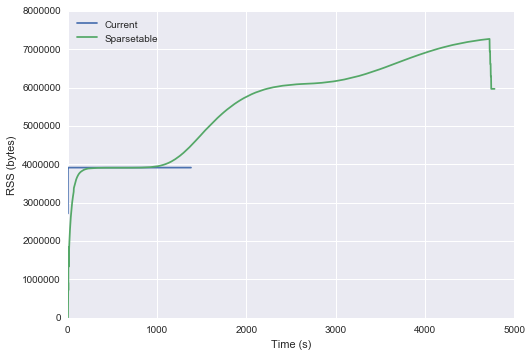

In [25]:
sns.plt.plot(df_nosh['RSS'], label="Current")
sns.plt.plot(df_sh['RSS'], label="Sparsetable")
sns.plt.xlabel("Time (s)")
sns.plt.ylabel("RSS (bytes)")
sns.plt.legend(loc="best")